In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import losses, metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import keras_nlp
import keras
from nltk.stem import SnowballStemmer
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [7]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [8]:
nltk.download('stopwords')
language = "english"

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
sw = stopwords.words(language)
stemmer = SnowballStemmer(language)

In [10]:
X = train_df['text'].tolist()

In [11]:
X = [i.lower() for i in X]

In [12]:
X[0:10]

['our deeds are the reason of this #earthquake may allah forgive us all',
 'forest fire near la ronge sask. canada',
 "all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in california ',
 'just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school ',
 '#rockyfire update => california hwy. 20 closed in both directions due to lake county fire - #cafire #wildfires',
 '#flood #disaster heavy rain causes flash flooding of streets in manitou, colorado springs areas',
 "i'm on top of the hill and i can see a fire in the woods...",
 "there's an emergency evacuation happening now in the building across the street",
 "i'm afraid that the tornado is coming to our area..."]

In [13]:
tfidf = TfidfVectorizer(stop_words=None, tokenizer=lambda x: [stemmer.stem(i) for i in x.split()])
X = tfidf.fit_transform(X)
y = train_df['target']

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
X.shape

(7613, 24638)

In [15]:
from sklearn.model_selection import train_test_split
# Dividi i dati in set di addestramento e validazione
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [16]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [17]:
lr = LogisticRegression()
grid_search = GridSearchCV(lr, param_grid, cv=5)


In [18]:
grid_search.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [19]:
print("Best parameters: ", grid_search.best_params_)

# Print the best score
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters:  {'C': 10}
Best cross-validation score:  0.7942528735632184


In [20]:
predictions_train = grid_search.predict(x_train)
predictions_val = grid_search.predict(x_val)

In [21]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,  # Rimuovi np.argmax
        display_labels=["Not Disaster","Disaster"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))

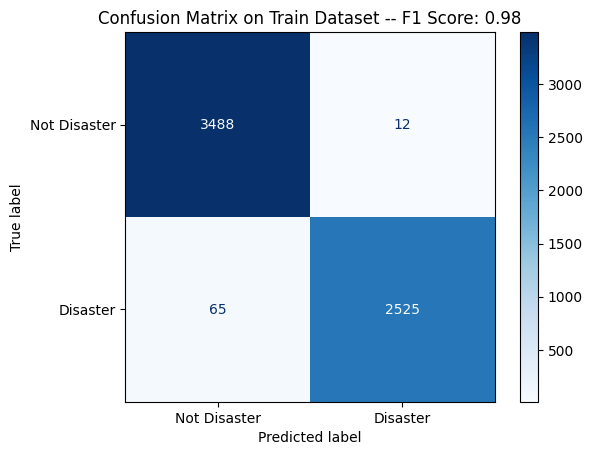

In [22]:
displayConfusionMatrix(y_train, predictions_train,"Train")

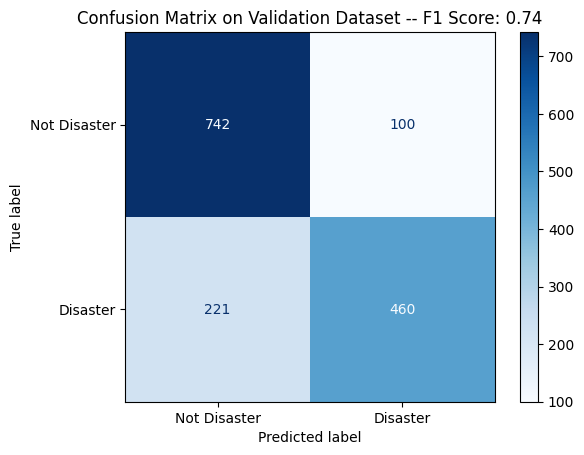

In [23]:
displayConfusionMatrix(y_val, predictions_val,"Validation")

**Training the model on the whole dataset in order to make the submission**

In [24]:
X_test = test_df['text'].tolist()
X_test = [i.lower() for i in X_test]
X_test = tfidf.transform(X_test)

In [27]:
lr = LogisticRegression(C=10)
lr.fit(X,y)
output = lr.predict(X_test)

In [30]:
submission_df = pd.DataFrame({'Id': test_df['id'], 'target': output})

In [32]:
submission_df.to_csv('sample_submission.csv', index=False, sep=',')